In [30]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tck

from src.utils.plotting import init_plot_style
from src.utils.plotting import ex2_signal_time_frequency
from src.utils.dft import dft
from scipy.fft import fft, fftfreq, fftshift

#%pylab
%matplotlib inline  

init_plot_style()
plt.rcParams.update({
    "text.usetex": True})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
def coef(c,A):
    """Compute the coefficents for the given function, evaluate at x =c, with input parameter A"""
    
    '''
    fc0 = 1/(1+np.exp(-c))
    fc1 = np.exp(-c)/(1+np.exp(-c))**2
    fc2 = -np.exp(-c)/(1+np.exp(-c))**2 + 2*np.exp(-2*c)/(1+np.exp(-c))**3
    fc3 = np.exp(-c)/(1+np.exp(-c))**2 - 6*np.exp(-2*c)/(1+np.exp(-c))**3 + 6*np.exp(-3*c)/(1+np.exp(-c))**4
    
    ''' 
    fc0 = 1/(1+np.exp(-c))
    fc1 = np.exp(-c)/(1+np.exp(-c))**2
    fc2 = - np.exp(c)*(-1+np.exp(c))/(1+np.exp(c))**3
    fc3 = np.exp(c)*(-4*np.exp(c)+np.exp(2*c)+1)/(1+np.exp(c))**4
                       
    a0 = fc0 -fc1*c + 0.5*fc2*(c**2)-(1/6)*fc3*(c**3) +0.25*(A**2)*(fc2-c*fc3)
    a1 = (fc1 -fc2*c+0.5*fc3*(c**2))*A + 0.75*(1/6)*fc3*(A**3)
    a2 = 0.25*(A**2)*(fc2-fc3*c)
    a3 = 0.25*(1/6)*fc3*(A**3)
    
        
    return [a0, a1, a2, a3]

def system(x, A):
    """Original system f(x[n])"""
    theta = np.pi*2/5
    y = 1/(1+np.exp(-A*np.cos(theta*x)))
    return y

def system_v2(signal):
    """Original system f(x[n])"""
    y = 1/(1+np.exp(-signal))
    return y

def approx_sys(x, a):
    """Evaluate Taylor approximation"""
    theta = np.pi*2/5
    y_hat = a[0] + a[1]*np.cos(theta*x)+a[2]*np.cos(2*theta*x) + a[3]*np.cos(3*theta*x)
    return y_hat



In [32]:
#alpha = np.zeros([1,4])
alpha_0_1 = coef(0,1)
alpha_ln_1 = coef(np.log(2),1)

alpha_0_3 = coef(0,3)
alpha_ln_3 = coef(np.log(2),3)

#Evaluate the system
theta = 2*np.pi/5 # discrete frequency
k = 3    # number of periods
N = 5*k   # number of samples
x = np.arange(0,N) # discrete time vector
signal = np.cos(theta*x) # signal vector

y_1 = system_v2(signal*1)
y_3 = system_v2(signal*3)

y_0_1 = approx_sys(x,alpha_0_1)
y_ln_1 = approx_sys(x,alpha_ln_1)
y_0_3 = approx_sys(x,alpha_0_3)
y_ln_3 = approx_sys(x,alpha_ln_3)

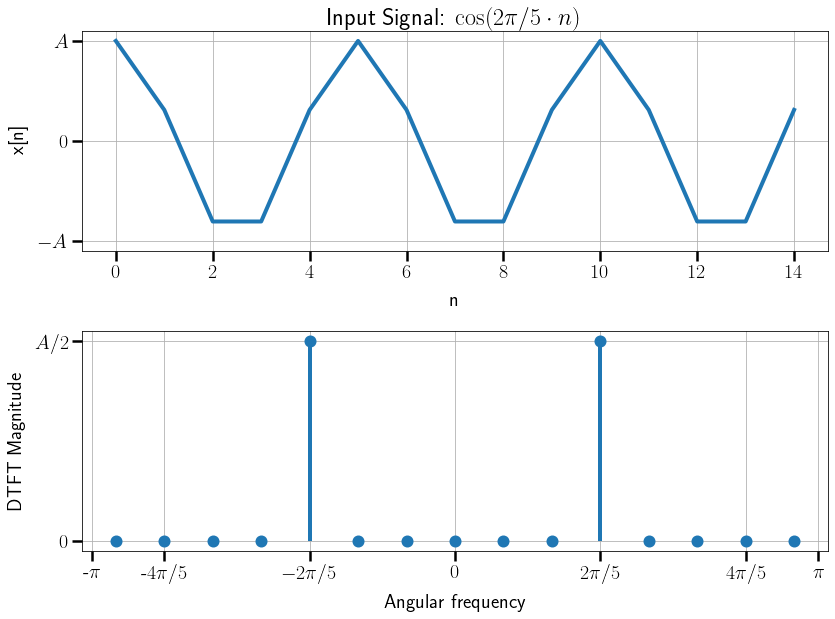

In [33]:
A = 3
# or: interpolation BUT leakage: N = 2**12
#X, f = dft(signal*A, fs=1, n_dft=N)

X = fftshift(fft(signal*A,N)/N)
f = fftshift(fftfreq(N, 1))

fig,ax=plt.subplots(2,figsize=(12,9))

ax[0].plot(x,signal*A,lw=4)
ax[0].set_title('Input Signal: $\cos(2\pi/5 \cdot n)$')
ax[0].set_xlabel('n')
ax[0].set_ylabel('x[n]')
ax[0].set_ylim([-A*1.1,A*1.1])
ax[0].set_yticks([0,A,-A])
ax[0].set_yticklabels(['$0$', '$A$', '$-A$'])
ax[0].grid()

markers, stems, _  = ax[1].stem(f,np.abs(X), label='Input Spectrum',basefmt=" ")
stems.set_linewidth(4)
markers.set_markersize(10)
ax[1].set_xlabel('Angular frequency')
ax[1].set_ylabel('DTFT Magnitude')
ax[1].set_xticks([0,0.5*2/5,0.5*4/5,0.5,-0.5*2/5,-0.5*4/5,-0.5])
labels = ['$0$', r'$2\pi/5$', r'$4\pi/5$', r'$\pi$', r'$-2\pi/5$', r'-$4\pi/5$', r'-$\pi$']
ax[1].set_xticklabels(labels)
ax[1].set_yticks([0,A/2])
ax[1].set_yticklabels(['$0$', '$A/2$'])
ax[1].grid(True)

plt.tight_layout()



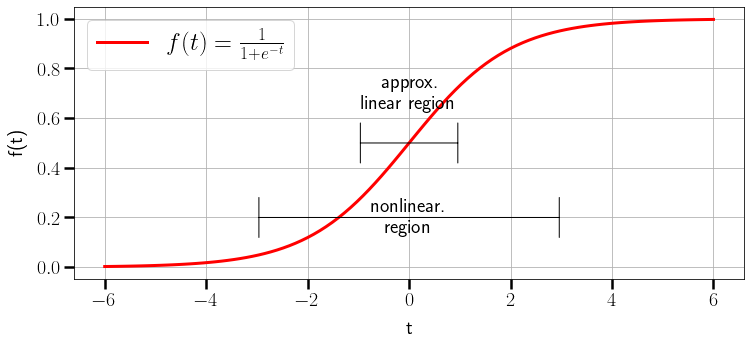

In [34]:
t = np.linspace(-6,6,100)
sigmoid = 1/(1+np.exp(-t))

fig,ax=plt.subplots(1,1, figsize=(12,5))
ax.plot(t,sigmoid, label=r'$f(t)=\frac{1}{1+e^{-t}}$',color='red',lw=3)
ax.set_xlabel('t')
ax.set_ylabel('f(t)')
ax.legend(loc=2,prop={'size': 25})
ax.annotate('', xy=(-1,0.5), xytext=(1,0.5), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|'})
ax.annotate('approx.\n linear region', xy=(-0, 0.7), ha='center', va='center')
ax.annotate('', xy=(-3,0.2), xytext=(3,0.2), xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|'})
ax.annotate('nonlinear.\n region', xy=(0, 0.2), ha='center', va='center')
ax.grid()

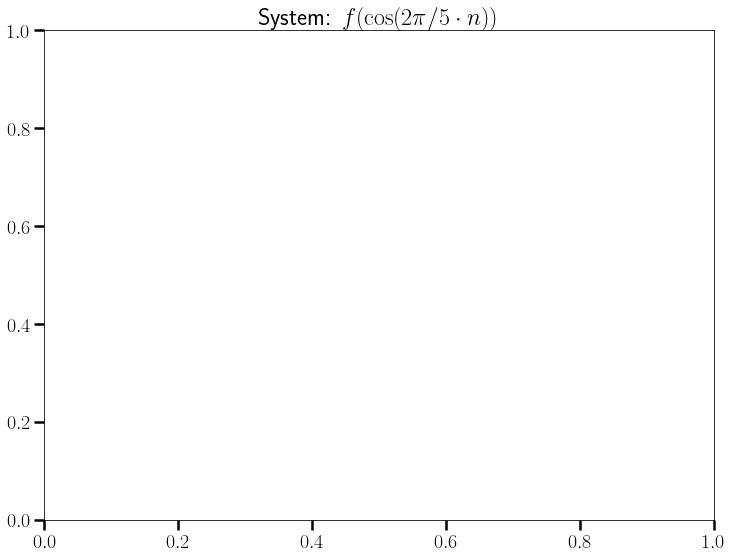

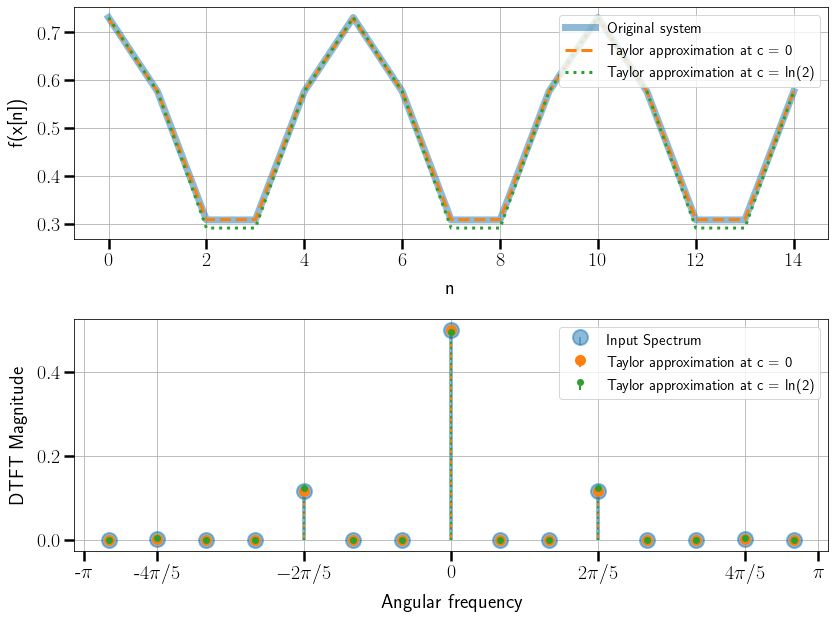

In [38]:
fs = 1
Y = fftshift(np.abs(fft(y_1))/N)
Y_0_1 = fftshift(np.abs(fft(y_0_1)/N))
Y_ln_1 = fftshift(np.abs(fft(y_ln_1)/N))
f = fftshift(fftfreq(N, 1/fs))

ex2_signal_time_frequency(x,y_1,y_0_1,y_ln_1,f,Y,Y_0_1,Y_ln_1,title='System: $f(\cos(2\pi/5 \cdot n))$')

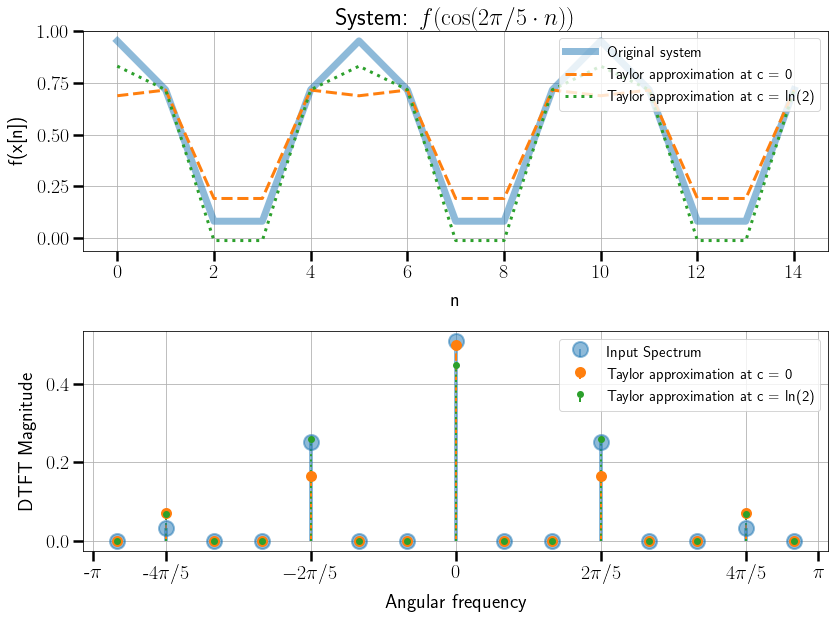

In [39]:
fs = 1
Y = fftshift(np.abs(fft(y_3))/N)
Y_0_3 = fftshift(np.abs(fft(y_0_3)/N))
Y_ln_3 = fftshift(np.abs(fft(y_ln_3)/N))
f = fftshift(fftfreq(N, 1/fs))

ex2_signal_time_frequency(x,y_3,y_0_3,y_ln_3,f,Y,Y_0_3,Y_ln_3,title='System: $f(\cos(2\pi/5 \cdot n))$')